In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

In [32]:
class AbstractDerivative:
    
    def __init__(self, f):
        self.f = f
        self._maxStencilSize = 5
        self.SetCoeffs()
    
    def SetStep(self, h):
        self._h = float(h)
        self._stencilPoints = np.array([self._h*i \
                                   for i in range(int(-(self._maxStencilSize - 1)/2), \
                                           int((self._maxStencilSize - 1)/2) + 1)])
        
    def SetCoeffs(self):
        raise NotImplementedError
                                            
    def __call__(self, x):
        movedStencilPoints = self._stencilPoints + float(x)
                       
        value = 0.
        for i in range(self._maxStencilSize):
            value += self._coeffs[i]*self.f(movedStencilPoints[i])
        value /= self._h
        
        return value

### Классы наследники

In [33]:
class Derivative1stOrderRight(AbstractDerivative):
    
    #def __init(self, func, step=1e-4):
        #AbstractDerivative.__init__(self, func, step)
        
    def SetCoeffs(self):
        self._coeffs = np.zeros(self._maxStencilSize)
        self._coeffs[2] = -1.
        self._coeffs[3] = 1.
        
class Derivative2ndOrderCentral(AbstractDerivative):
    
    def SetCoeffs(self):
        self._coeffs = np.zeros(self._maxStencilSize)
        self._coeffs[1] = -1./2
        self._coeffs[3] = 1./2

### Тестирование

In [50]:
testFunc = m.sin #lambda t: m.sin(t)
h = 1e-2
derivative1stOrder = Derivative2ndOrderCentral(testFunc)
derivative1stOrder.SetStep(1e-4)
#derivative2ndOrder = Derivative2ndOrderCentral(testFunc, h)
derivative1stOrder.f = m.cos
derivative1stOrder.SetStep(5.*1e-16)

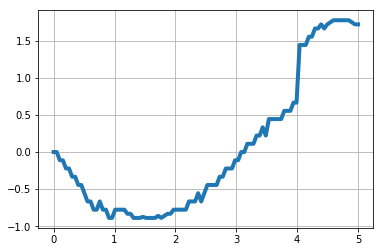

In [51]:
xData = np.linspace(0, 5, 100)
yData1 = np.array([derivative1stOrder(x) for x in xData])

plt.figure()
plt.plot(xData, yData1, lw=4)
plt.grid('on')
plt.show()